## RAG(Retrieval-Augmented Generation) 개요

RAG는 외부 지식 소스를 모델의 입력으로 통합하여 정확도와 정보량을 높이는 기법입니다. 전통적인 LLM은 파라미터에 내장된 지식만을 활용하지만, RAG는 검색된 문서를 추가(prompt)함으로써 최신 데이터나 도메인 특화 정보를 즉시 활용할 수 있습니다.

---

## 1. Vector RAG

**정의**: 문서를 임베딩 공간에 매핑한 뒤, 사용자 질문에 유사도가 높은 문서 청크를 검색하여 LLM에 전달하는 방식입니다.

**주요 구성요소**:
1. **임베딩(Embeddings)**: 텍스트를 벡터로 변환  
2. **벡터 스토어(Vector Store)**: FAISS, Chroma, Pinecone 등  
3. **유사도 검색(Similarity Search)**: 코사인 유사도나 내적 기반 Top-K 검색  
4. **LLM**: 검색된 청크를 prompt에 결합하여 응답 생성

**장점**:
- **유연한 검색**: 대규모 데이터에 대해 빠른 근사 유사도 검색 가능  
- **확장성**: 클라우드 기반 벡터 DB와 쉽게 통합  
- **단순 구조**: 구현 및 유지보수가 상대적으로 간단

**단점**:
- **관계 정보 부족**: 청크 간 구조적 연결을 반영하기 어려움  
- **문맥 단절 가능성**: 개별 청크 간 흐름이 끊길 수 있음

---

## 2. Graph RAG

**정의**: 문서에서 개체(entity)와 관계(relationship)를 추출하여 지식 그래프 형태로 인덱싱한 후, 그래프 탐색(path search) 기반으로 관련 정보를 수집하여 LLM에 전달하는 방식입니다.

**주요 구성요소**:
1. **개체/관계 추출(NER & RE)**: 문서에서 엔티티와 관계 식별  
2. **지식 그래프(Knowledge Graph)**: 노드(개체)와 엣지(관계)로 구조화  
3. **그래프 탐색(Graph Traversal)**: 질문과 관련된 서브그래프 추출  
4. **LLM**: 서브그래프를 순서대로 prompt에 넣거나 요약 후 응답 생성

**장점**:
- **구조적 추론**: 노드 간 경로를 활용한 심층적 관계 이해  
- **설명 가능성**: LLM이 참조한 그래프 경로를 근거로 제시 가능  
- **복잡한 질의 처리**: 멀티홉(multi-hop) 질문에 유리

**단점**:
- **구현 복잡도**: 개체/관계 추출, 그래프 구축 로직 필요  
- **정확도 민감도**: NER/RE 오류가 전체 성능에 크게 영향  
- **확장성 한계**: 초대규모 문서에 그래프를 유지·탐색하는 비용

---

## 3. Vector RAG vs Graph RAG 비교표

| 구분           | Vector RAG                          | Graph RAG                                       |
| -------------- | ----------------------------------- | ------------------------------------------------ |
| 검색 방식      | 유사도(벡터) 기반 Top-K             | 그래프 탐색(Path-based)                          |
| 구조 인식      | 청크 단위, 비구조적                 | 엔티티-관계 구조, 멀티홉 추론 가능               |
| 설명 가능성    | 제한적                              | 탐색 경로 기반 근거 제시 가능                    |
| 구현 난이도    | 낮음                                | 높음                                             |
| 확장성         | 높음                                | 문서 규모에 따라 탐색 비용 증가                   |
| 대표 사용 사례 | FAQ, 문서 요약, 키워드 질의         | 복잡한 관계 추론, 도메인 특화 지식 그래프 활용   |

---

### 결론

- **Vector RAG**는 빠르고 쉽게 대규모 문서를 검색하여 정보 보강이 필요한 애플리케이션에 적합합니다.  
- **Graph RAG**는 문서 내 개체와 관계를 구조적으로 이해하고, 심층적 멀티홉 추론 또는 설명 가능성이 필요한 시나리오에서 강점을 발휘합니다.  
- 실제 시스템 설계 시, 두 접근 방식을 **하이브리드**로 결합하여 유연성과 설명력을 모두 확보하는 전략을 고려할 수 있습니다.

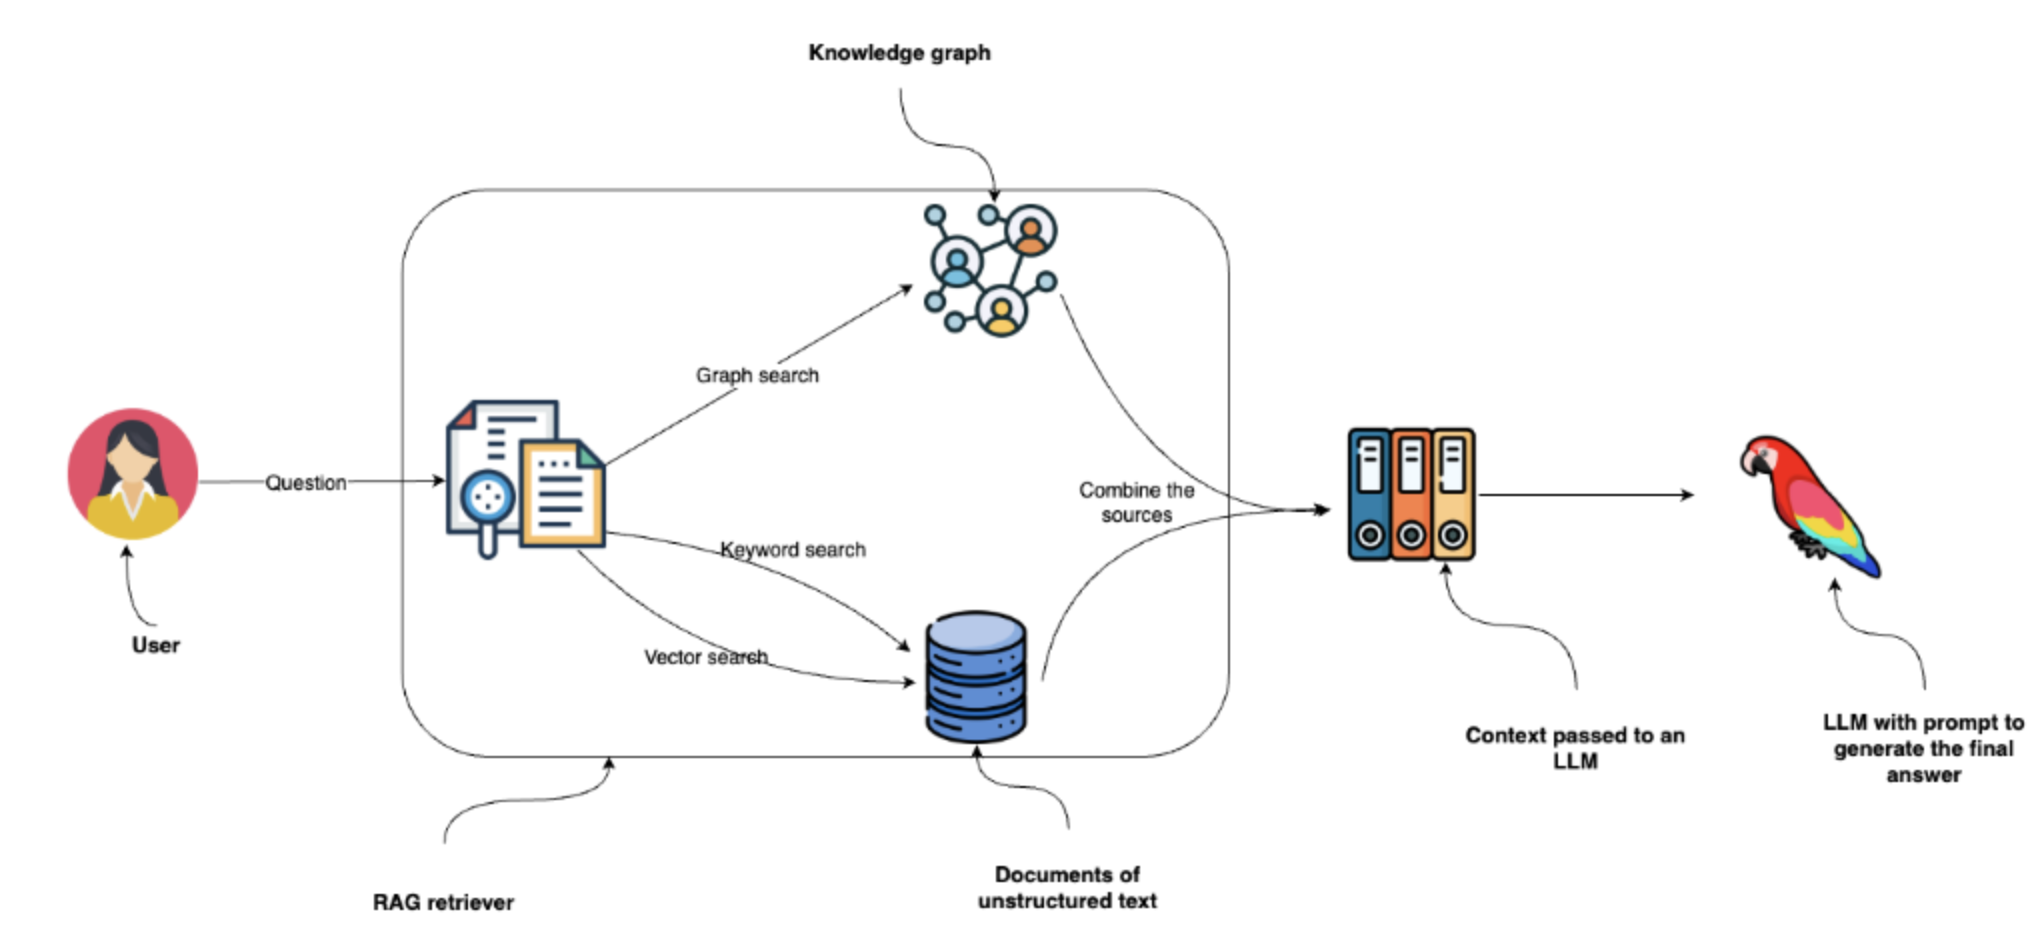

## 지식 그래프(Knowledge Graph) 개요

**정의**  
실세계의 개체(entity)와 이들 간의 관계(relationship)를 노드(node)와 엣지(edge)로 구조화하여 표현한 그래프 형태의 데이터베이스입니다.

---

### 주요 구성 요소

- **노드(Node)**  
  개체(Entity)를 나타냅니다.  
  예: 사람(Person), 장소(Place), 제품(Product), 개념(Concept) 등  

- **엣지(Edge)**  
  노드 간 관계(Relationship)를 나타냅니다.  
  예: **“Alice –[works_at]→ AcmeCorp”**, **“Paris –[capital_of]→ France”**  

- **속성(Properties)**  
  노드나 엣지가 가질 수 있는 추가 정보(메타데이터)입니다.  
  예: 생성일(created_at), 설명(description), 출처(source) 등  

---

### 지식 그래프 구축 단계

1. **데이터 수집**  
   - 텍스트 문서, 관계형 DB, API, 웹 크롤링 등 다양한 소스에서 원천 데이터 확보  
2. **개체 추출(NER)**  
   - 자연어 처리 기법으로 텍스트에서 명사구나 고유명사를 식별  
3. **관계 추출(RE)**  
   - 추출된 개체 간 의미 관계를 파악 (예: “works at”, “located in”)  
4. **정규화 및 통합**  
   - 유사 개체 병합, 중복 제거, 표준화된 식별자 매핑  
5. **그래프 저장 및 관리**  
   - Neo4j, Amazon Neptune, RDF 스토어 등 그래프 DB에 모델링하여 저장  

---

### 주요 용도 및 장점

- **시맨틱 검색(Semantic Search)**  
  단순 키워드 매칭을 넘어, 의미 기반으로 연관 정보를 효과적으로 검색  
- **추천 시스템(Recommendation)**  
  사용자의 속성·행동과 아이템 간 연결 관계를 활용한 정밀 추천  
- **데이터 통합(Data Integration)**  
  이질적 데이터 소스 간 연결고리를 만들어 데이터 연계·통합 용이  
- **추론 및 분석(Inference & Analytics)**  
  그래프 알고리즘(최단경로, 커뮤니티 탐지 등)을 통해 복잡한 패턴·관계 분석  

---

### 한계 및 고려사항

- **스케일(규모)**  
  엔티티·관계 수가 급증할수록 저장·탐색 성능 최적화 필요  
- **정확도 의존성**  
  NER/RE 성능이 낮으면 잘못된 노드·엣지가 생성되어 그래프 품질 저하  
- **갱신 관리(Update)**  
  실시간 또는 주기적 데이터 변경 반영 전략(증분 업데이트, 배치 재구축 등) 설계 필요  

---

### 주요 기술 및 도구

- **그래프 데이터베이스**: Neo4j, Amazon Neptune, JanusGraph  
- **표준 언어 & 프로토콜**: RDF, SPARQL, OWL  
- **라이브러리 & 프레임워크**: Apache Jena, RDFLib, TigerGraph, GraphX  


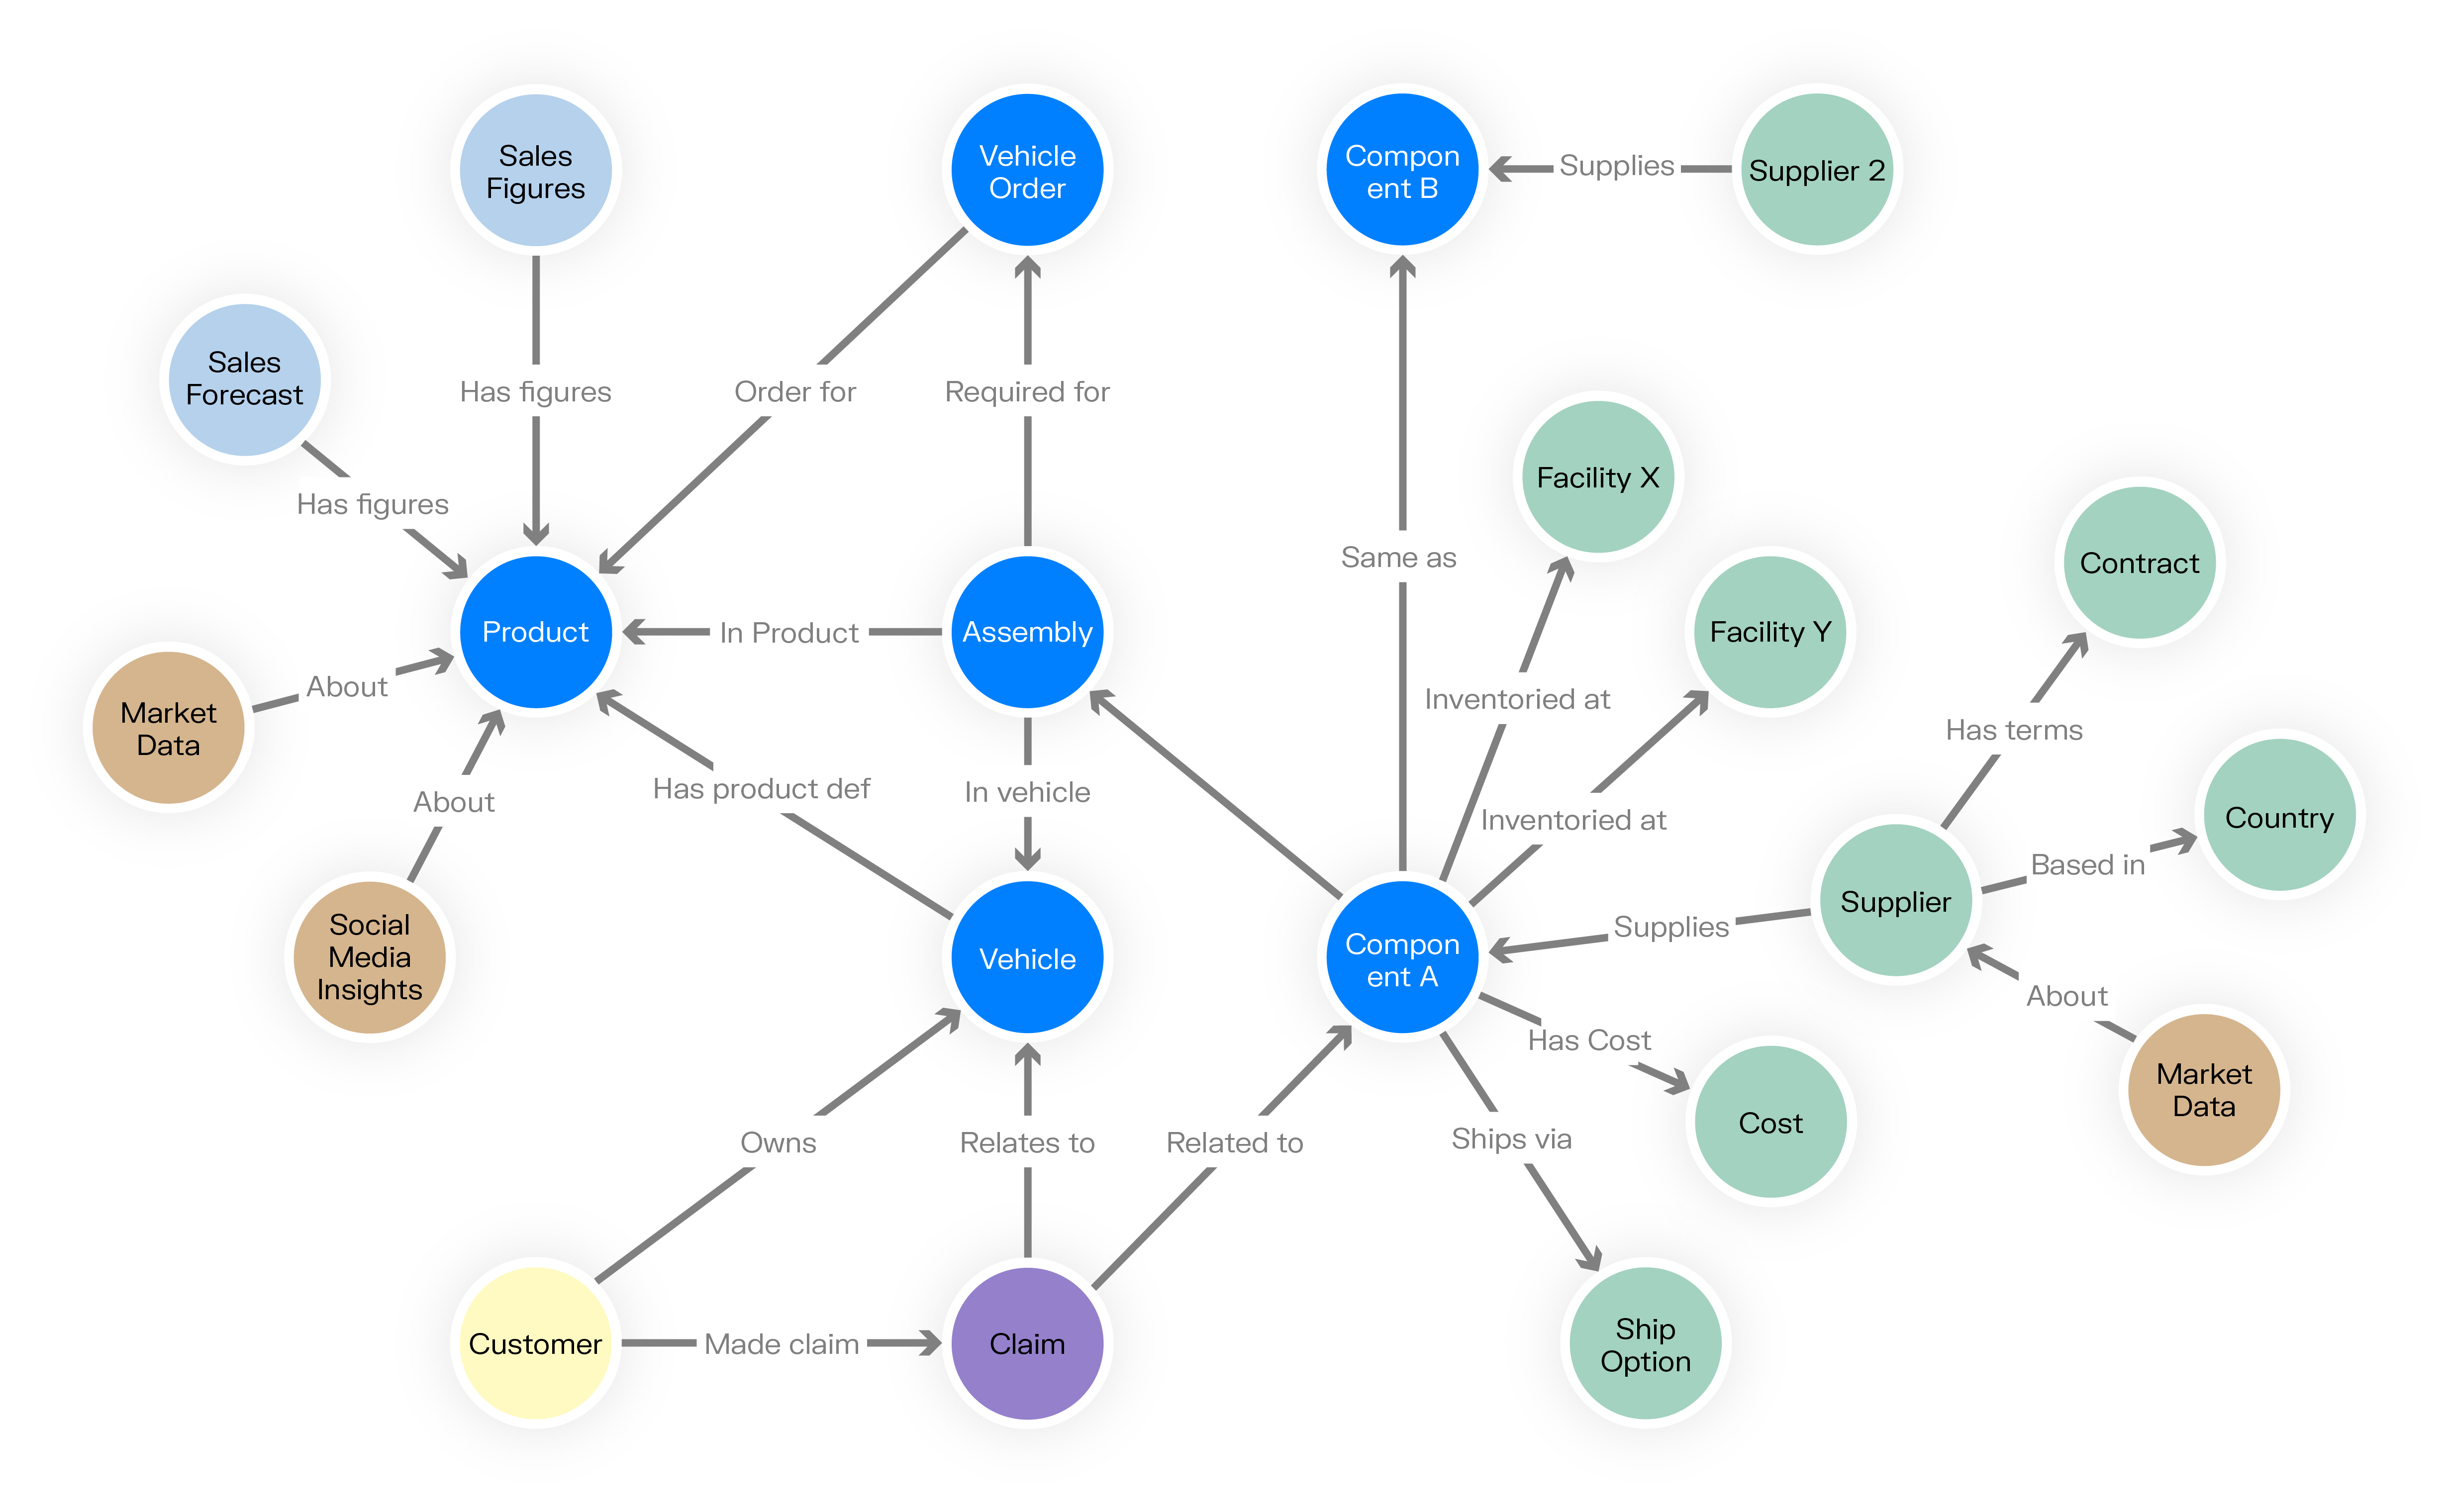

In [1]:
import os
from dotenv import load_dotenv
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain_openai import ChatOpenAI
from langchain_community.graphs.index_creator import GraphIndexCreator
from langchain_community.chains.graph_qa.base import GraphQAChain

# 1) 환경 변수 로드
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [5]:
# 2) PDF 파일 로드 및 Document 리스트 생성
pdf_folder = "personal"
docs = []
for fname in os.listdir(pdf_folder):
    if fname.lower().endswith(".pdf"):
        full_path = os.path.join(pdf_folder, fname)
        loader = PyPDFLoader(full_path)
        loaded = loader.load()
        print(f"Loaded {len(loaded)} pages from {fname}")
        docs.extend(loaded)

# 3) 문서 분할
splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
chunks = splitter.split_documents(docs)
print(f"Total chunks: {len(chunks)}")

# 4) 벡터 스토어 생성 (RAG용)
embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small",
    openai_api_key=OPENAI_API_KEY
)
vectorstore = Chroma.from_documents(
    documents=docs,
    embedding=embeddings,
    persist_directory="pdf_db",
    collection_name="pdf_chunks"
)
vectorstore.persist()
print("Vector DB stored with", vectorstore._collection.count(), "chunks")

Loaded 20 pages from Demystifying large language models in second language development research.pdf
Loaded 14 pages from dynamic social representations of the 2009 h1n1 pandemic.pdf
Loaded 12 pages from underachievement among gifted students of color.pdf
Loaded 25 pages from the scientific method as myth and ideal.pdf
Total chunks: 71
Vector DB stored with 142 chunks


In [11]:
%%time

# 5) 그래프 인덱스 생성
llm = ChatOpenAI(temperature=0, model_name="gpt-4o", openai_api_key=OPENAI_API_KEY)
index_creator = GraphIndexCreator(llm=llm)
# 모든 청크 텍스트 결합 (혹은 원하는 subset)
all_text = "\n\n".join(chunk.page_content for chunk in chunks)
graph = index_creator.from_text(all_text)
print("Graph built with nodes:", graph._graph.number_of_nodes(), "and edges:", graph._graph.number_of_edges())

# 6) 그래프 QA 체인 생성 및 질의
qa_chain = GraphQAChain.from_llm(
    llm=llm,
    graph=graph,
    verbose=True
)
query = "놀람에 대해 설명해 줘."
answer = qa_chain.run(query)
print("Answer:", answer)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Graph built with nodes: 158 and edges: 150
Entities Extracted:
NONE
Full Context:


> Finished chain.
Answer: 죄송하지만, 주어진 지식 삼중항을 기반으로 놀람에 대한 설명을 제공할 수 없습니다. 추가적인 정보가 필요합니다.


In [10]:
# graph = index_creator.from_text(all_text) 이후

# 실제 networkx 그래프 객체 가져오기 시도
nx_graph = None
if hasattr(graph, 'graph'): # 가장 일반적인 경우
    nx_graph = graph.graph
elif hasattr(graph, '_graph'): # 이전 코드에서 사용된 방식
    nx_graph = graph._graph
elif hasattr(graph, 'get_graph'): # 메소드일 경우
    nx_graph = graph.get_graph()

if nx_graph:
    print(f"그래프 노드 수: {nx_graph.number_of_nodes()}")
    print(f"그래프 엣지 수: {nx_graph.number_of_edges()}")

    if nx_graph.number_of_nodes() > 0:
        print("\n전체 노드 목록 (일부만 표시될 수 있음):")
        # 모든 노드를 출력하려면 아래 for 문에서 [:10] 부분을 제거하거나 조절
        for i, node in enumerate(list(nx_graph.nodes())): 
            print(f"  - {node}")
            if i >= 100: # 너무 많으면 터미널이 느려질 수 있으니, 일단 100개로 제한 (필요시 조절)
                print("  ... (더 많은 노드가 있으나 일부만 표시)")
                break
    else:
        print("\n그래프에 노드가 없습니다.")

    if nx_graph.number_of_edges() > 0:
        print("\n--- 전체 엣지(삼중항) 목록 ---")
        for i, (u, v, data) in enumerate(nx_graph.edges(data=True)):
            relation = data.get('relation', data.get('type', 'unknown_relation'))
            print(f"  {i+1}. ({u}) -[{relation}]-> ({v})")
        print("--- 전체 엣지(삼중항) 목록 끝 ---")
    else:
        print("\n그래프에 엣지가 없습니다.")

    # Langchain의 KnowledgeGraph 객체가 get_triples() 메소드를 지원하는 경우
    if hasattr(graph, 'get_triples'):
        try:
            all_triples = graph.get_triples()
            if all_triples:
                print("\n--- 전체 추출된 삼중항 (get_triples) 목록 ---")
                for i, triple_data in enumerate(all_triples):
                    print(f"  {i+1}. {triple_data}")
                print("--- 전체 추출된 삼중항 (get_triples) 목록 끝 ---")
            else:
                print("\nget_triples()를 통해 반환된 삼중항이 없습니다.")
        except Exception as e:
            print(f"\nget_triples() 호출 중 오류: {e}")
else:
    print("NetworkX 그래프 객체를 찾을 수 없습니다. 'graph' 객체의 구조를 확인해주세요.")

그래프 노드 수: 88
그래프 엣지 수: 75

전체 노드 목록 (일부만 표시될 수 있음):
  - Descartes
  - antique scooters
  - mandolin
  - Nevada
  - state
  - US
  - gold
  - Yan Cong
  - School of Languages and Cultures
  - Purdue University
  - LLM-Surprisal
  - numeric representation
  - interplay between lexical diversity and syntactic complexity
  - automatic writing assessment
  - Chinese L2 learners’ English writing development
  - LLM-based natural language processing pipeline
  - text Surprisal scores
  - LLM-Surprisals
  - L2 from L1 writing
  - L2 development stages
  - scores provided by human professionals
  - LLMs
  - enhancing L2 research
  - L2 research
  - innovative and accessible manner
  - writing
  - language learning
  - manual scoring of essays
  - time-consuming
  - consistency
  - transformer large language models
  - advancements in NLP
  - generating coherent and contextually relevant text
  - earlier NLP benchmarks
  - better understanding of L2 writing development
  - automatic essay assess

한글 폰트 설정: NanumSquareRound

그래프 시각화 이미지가 'knowledge_graph_visualization.png'로 저장되었습니다.


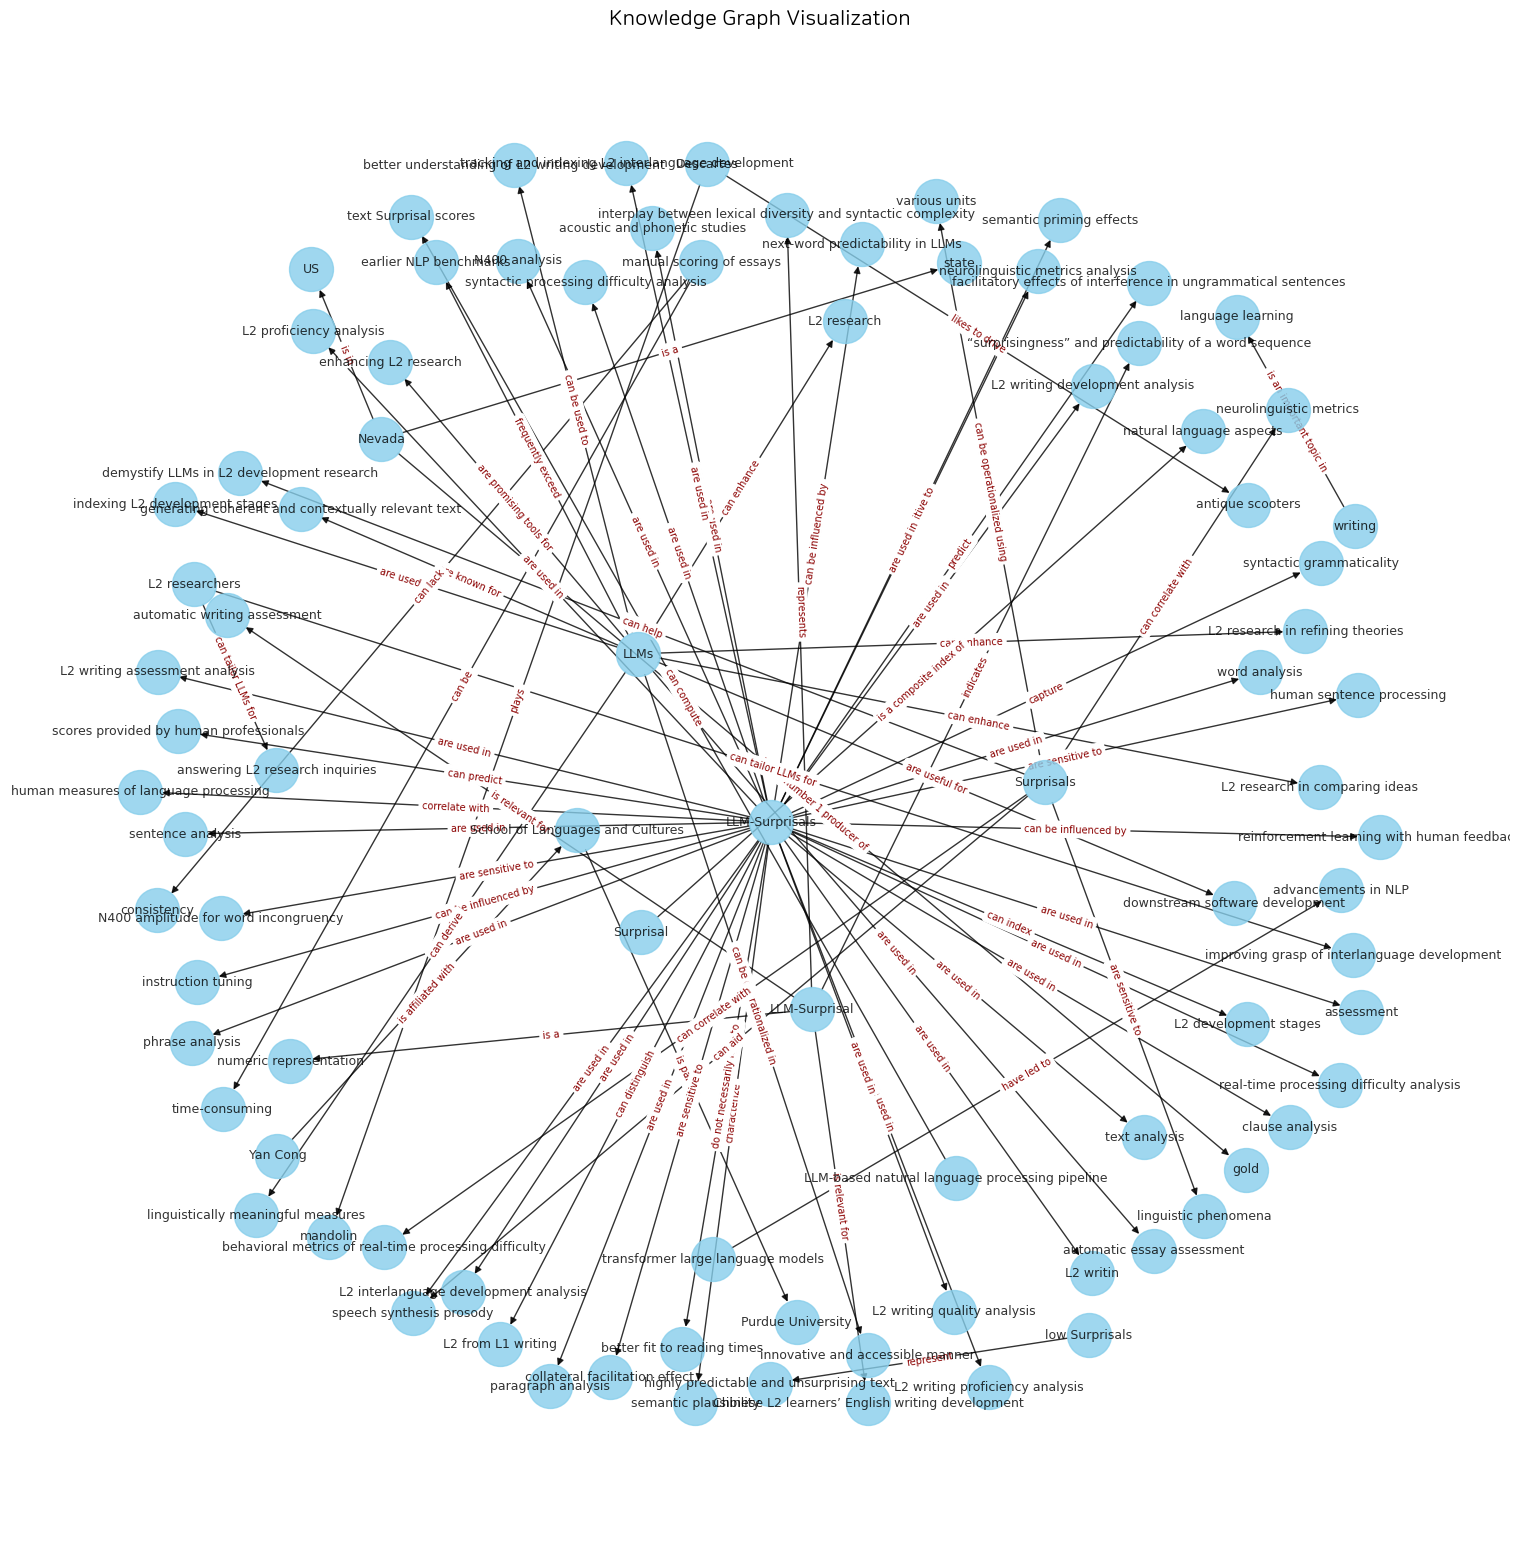

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (선택 사항, 시스템에 폰트가 설치되어 있어야 함)
# 사용 가능한 한글 폰트가 있는지 확인하고 설정합니다.
# 예: 'NanumGothic', 'Malgun Gothic' 등
try:
    # 사용 가능한 폰트 중 한글 지원 폰트 찾기 (예시)
    font_path = None
    for font in fm.fontManager.ttflist:
        if 'Nanum' in font.name or 'AppleGothic' in font.name or 'Malgun' in font.name: # macOS는 AppleGothic, Windows는 Malgun Gothic
            font_path = font.fname
            break
    if font_path:
        font_name = fm.FontProperties(fname=font_path).get_name()
        plt.rc('font', family=font_name)
        plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지
        print(f"한글 폰트 설정: {font_name}")
    else:
        print("적절한 한글 폰트를 찾지 못했습니다. 영문으로 표시될 수 있습니다.")
except Exception as e:
    print(f"폰트 설정 중 오류: {e}")


# nx_graph 변수가 위에서 정의된 실제 networkx 그래프 객체라고 가정

if nx_graph and nx_graph.number_of_nodes() > 0:
    if nx_graph.number_of_nodes() < 100: # 노드가 100개 미만일 때만 시도 (너무 많으면 복잡)
        plt.figure(figsize=(15, 15))
        
        # 레이아웃 알고리즘 선택 (spring_layout, circular_layout, kamada_kawai_layout 등)
        pos = nx.spring_layout(nx_graph, k=0.8, iterations=30, seed=42) # k는 노드 간 간격, iterations는 안정화 반복 횟수
        
        nx.draw(nx_graph, pos,
                with_labels=True,       # 노드에 라벨 표시
                node_size=1000,         # 노드 크기
                node_color="skyblue",   # 노드 색상
                font_size=9,            # 라벨 폰트 크기
                width=1.0,              # 엣지 두께
                alpha=0.8)              # 투명도

        # 엣지 라벨(관계) 표시
        edge_labels = {}
        for u, v, data in nx_graph.edges(data=True):
            relation = data.get('relation', data.get('type', 'unknown'))
            if isinstance(relation, list): # 관계가 리스트 형태일 경우 문자열로 변환
                relation = ", ".join(map(str,relation))
            edge_labels[(u, v)] = str(relation) # 관계를 문자열로 변환

        nx.draw_networkx_edge_labels(nx_graph, pos,
                                     edge_labels=edge_labels,
                                     font_size=7,
                                     font_color='darkred')
        
        plt.title("Knowledge Graph Visualization", fontsize=15)
        try:
            plt.savefig("knowledge_graph_visualization.png")
            print("\n그래프 시각화 이미지가 'knowledge_graph_visualization.png'로 저장되었습니다.")
            # plt.show() # Jupyter Notebook 등에서 바로 보려면 주석 해제
        except ImportError:
             print("\nMatplotlib이 설치되지 않았습니다. 'pip install matplotlib'로 설치해주세요.")
        except Exception as e:
            print(f"\n그래프 이미지 저장 중 오류: {e}")
            print("Matplotlib이 설치되어 있는지, 한글 폰트 경로가 올바른지 확인해주세요.")
    else:
        print(f"\n그래프의 노드 수가 {nx_graph.number_of_nodes()}개로 너무 많아 직접 시각화는 생략합니다.")
        print("대규모 그래프는 Gephi와 같은 전문 시각화 도구를 사용하거나,")
        print("그래프를 GEXF 또는 GraphML 파일로 내보내서 분석하는 것을 권장합니다.")
        # 예: nx.write_gexf(nx_graph, "my_knowledge_graph.gexf")

elif nx_graph and nx_graph.number_of_nodes() == 0:
    print("\n그래프에 노드가 없어 시각화할 수 없습니다.")
else:
    print("\nNetworkX 그래프 객체를 찾을 수 없어 시각화할 수 없습니다.")